In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read data into pandas dataframe
kick_data = pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter002.csv")
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter003.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter004.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter005.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter006.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter007.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter008.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter009.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter010.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter011.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter012.csv"))

# Isolate relevant attributes
kick_data = kick_data.loc[:, ['backers_count','blurb','category','country', 'goal', 
                              'staff_pick', 'state', 'usd_pledged']]
# initial count will return 41664 for most categories, 41662 for blurb column
kick_data.count()

kick_data.head()

In [127]:
# using new cell allows dataframe from previous cell to remain intact
# values in state column changed to integers for correlation analysis
kick_data.loc[kick_data["state"] == "successful", 'state'] = 1
kick_data.loc[kick_data["state"] == "failed", 'state'] = 0
kick_data.loc[kick_data["state"] == "canceled", 'state'] = 0
kick_data.loc[kick_data["state"] == "suspended", 'state'] = 0
# remove live entries as their final state is unknown
kick_data = kick_data[kick_data.state != 'live']
# remove rows with missing values
kick_data = kick_data.dropna()

kick_data.count()

backers_count    40167
blurb            40167
category         40167
country          40167
goal             40167
staff_pick       40167
state            40167
usd_pledged      40167
dtype: int64

In [131]:
# change state to int so that it will be in seaborn heatmap
kick_data['state'] = kick_data['state'].astype(str).astype(int)
# check if state column has been converted to int
print(kick_data.dtypes) 

backers_count      int64
blurb             object
category          object
country           object
goal             float64
staff_pick          bool
state              int64
usd_pledged      float64
dtype: object


In [ ]:
# Count entries per value in category column
kick_data['category'].value_counts()
# Return entries per value in category column with a count of less than a certain number
kick_data['category'].value_counts()[kick_data['category'].value_counts()<1]
# Count how many unique values in category column
kick_data['category'].nunique()

In [ ]:
# Count entries per value in country column
kick_data['country'].value_counts()

In [ ]:
# Count entries per value in staff_pick column
kick_data['staff_pick'].value_counts()

In [ ]:
# Count entries per value in state column
kick_data['state'].value_counts()

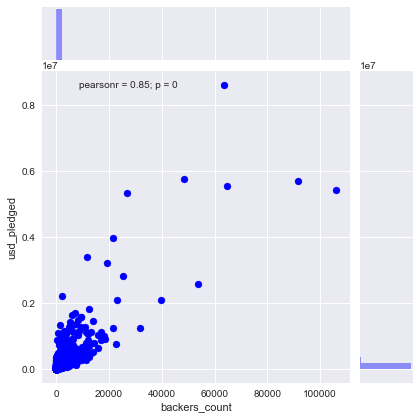

In [135]:
# Construct seaborn jointplot
sns.jointplot(data=kick_data, x='backers_count', y='usd_pledged', color='b')

# Show plot
plt.show()

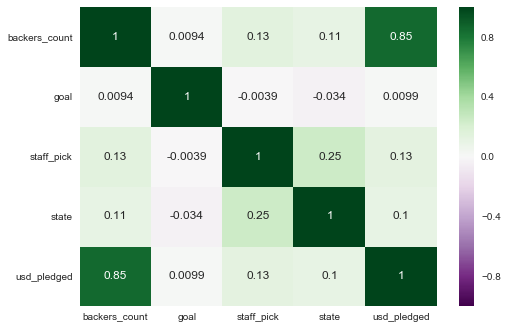

In [134]:
# Construct seaborn heatmap to get correlations between attributes
sns.heatmap(kick_data.corr(), annot=True, cmap='PRGn')
# Show plot
plt.show()

In [ ]:
# Construct seaborn boxplot to see how being a staff pick affects how much is pledged
sns.boxplot(x="staff_pick", y="usd_pledged", data=kick_data)
# Show plot
plt.show()

In [ ]:
# Construct seaborn boxplot to see how country affects how much is pledged
sns.boxplot(x="country", y="usd_pledged", data=kick_data)
# Show plot
plt.show()

In [ ]:
# Construct heatmap to show median value of usd_pledged based on country and staff pick
kick_pt = kick_data.pivot_table(index='country', columns='staff_pick', values='usd_pledged', aggfunc=np.median)
sns.heatmap(kick_pt, annot=True, fmt=".2f", cmap = "PRGn")
# Show plot
plt.show()

In [ ]:
# Count entries per country based on staff_pick
kick_pt = kick_data.pivot_table(index='country', columns='staff_pick', aggfunc='size')
sns.heatmap(kick_pt, annot=True, fmt=".0f", cmap = "PRGn")
# Show plot
plt.show()

In [ ]:
# Construct heatmap to show maximum value of usd_pledged based on country and staff pick
kick_pt = kick_data.pivot_table(index='country', columns='state', values='usd_pledged', aggfunc=np.max)
sns.heatmap(kick_pt, annot=True, fmt=".2f", cmap = "PRGn")
# Show plot
plt.show()

In [ ]:
# find proportion of successful entries for each category
# find proportion of successful entries for each country
# find average goal and usd_pledged for project
# create model predicting success based on other attributes
# use training and testing data to classify state based on other attributes